## Morphological Operations on an Image with different Structuring Elements

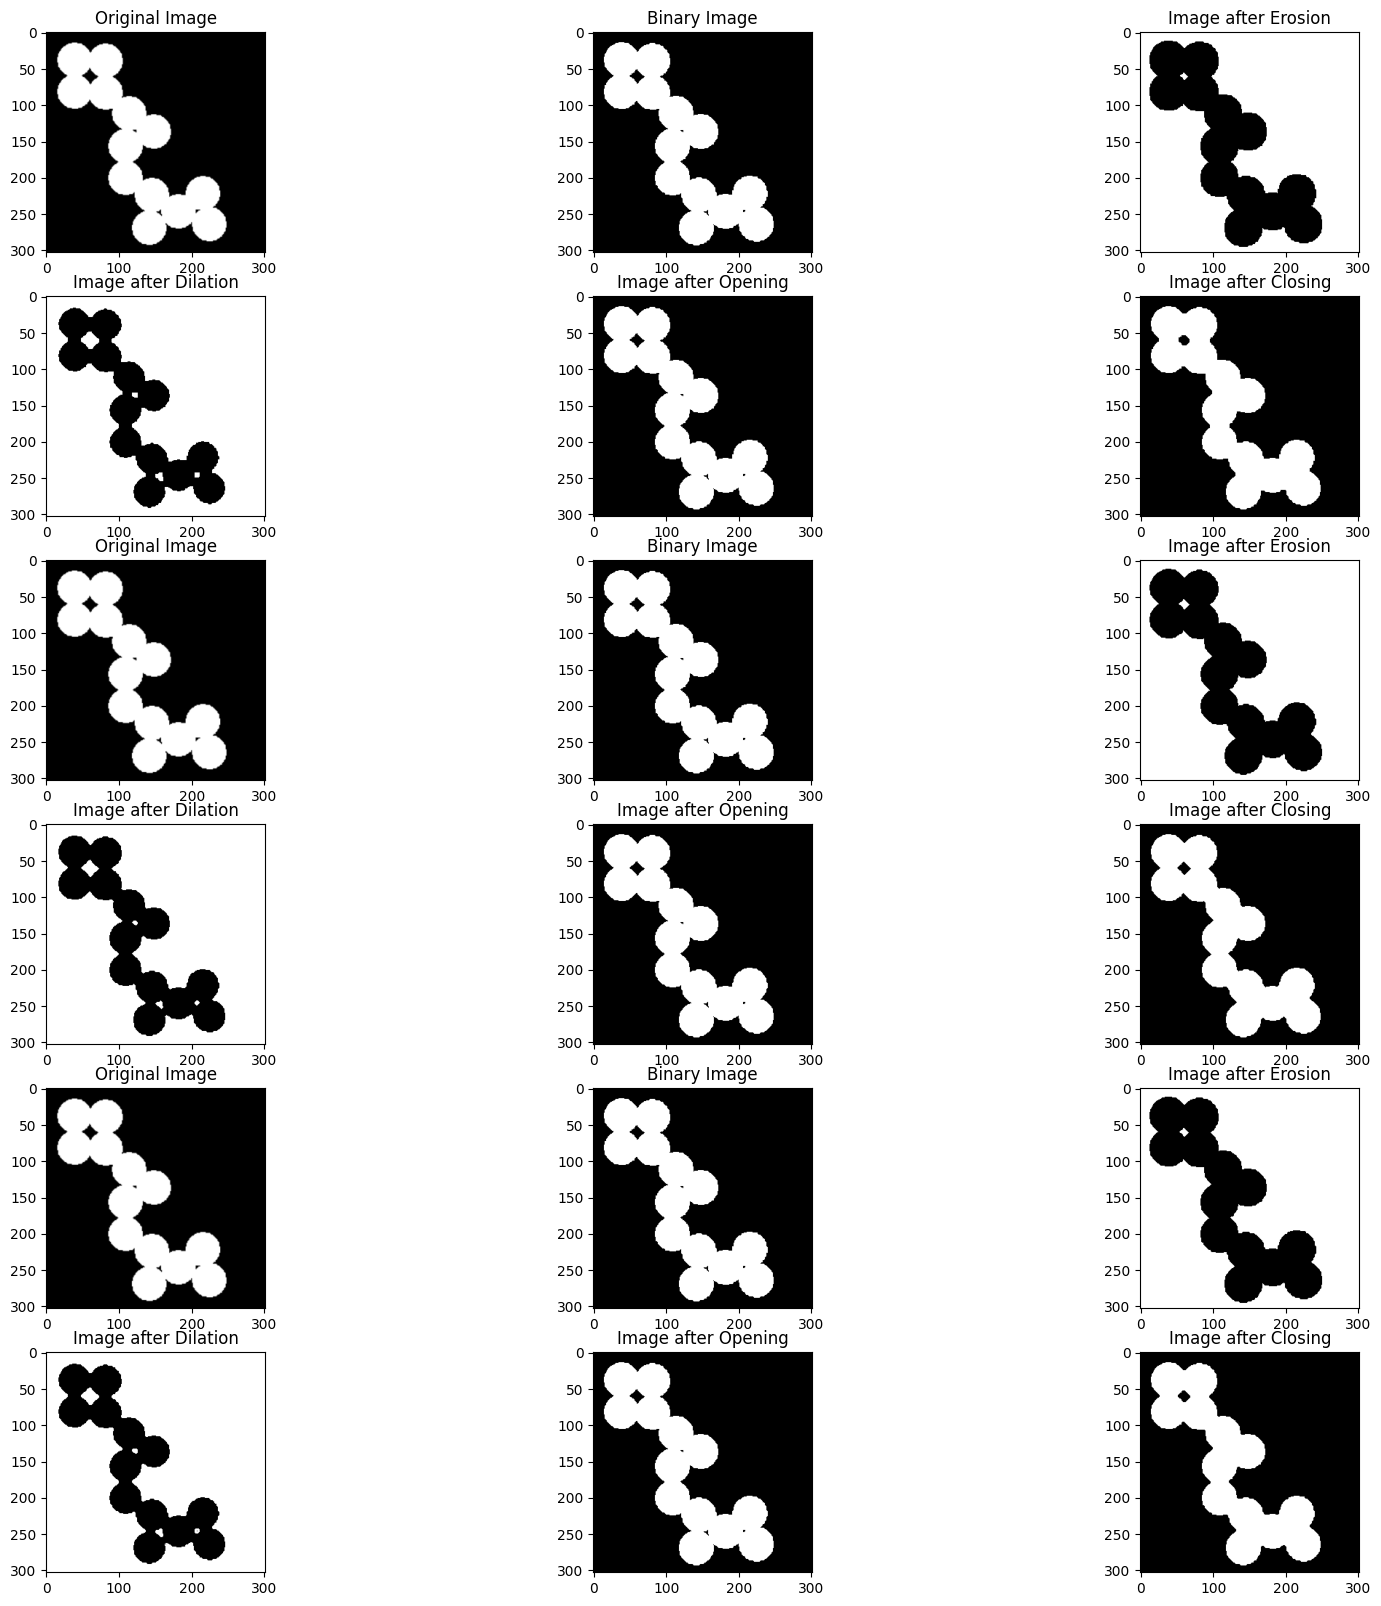

In [ ]:
#morphological operations: erosion, dilation, opening, closing

import cv2
import numpy as np
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(20,20))

image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Standard Images/morph1.png")
def morph_ops(kernel,i):
    img1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    img2=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

    #erosion
    #to erode the outer surface/foreground of the image

    _,binary_img=cv2.threshold(img2,50,255,cv2.THRESH_BINARY)

    #invert the binary image
    invert_bin_img=cv2.bitwise_not(binary_img)

    erosion=cv2.erode(invert_bin_img,kernel,iterations=1)
    erosion=cv2.cvtColor(erosion,cv2.COLOR_BGR2RGB)

    #dilation
    #dilates the foreground of the image
    #expands the foreground of the image and make it white
    dilation=cv2.dilate(invert_bin_img,kernel,iterations=1)
    dilation=cv2.cvtColor(dilation,cv2.COLOR_BGR2RGB)

    #opening
    #involves erosion followed by dilation in the foreground of the image
    opening=cv2.morphologyEx(binary_img,cv2.MORPH_OPEN,kernel,iterations=1)
    opening=cv2.cvtColor(opening,cv2.COLOR_BGR2RGB)

    #closing
    #involves dilation followed by erosion in the outer surface of the image
    closing=cv2.morphologyEx(binary_img,cv2.MORPH_CLOSE,kernel,iterations=1)
    closing=cv2.cvtColor(closing,cv2.COLOR_BGR2RGB)

    fig.add_subplot(6,3,i)
    plt.imshow(img1)
    plt.title('Original Image')
    i=i+1
    fig.add_subplot(6,3,i)
    plt.imshow(binary_img,cmap="gray")
    plt.title('Binary Image')
    i=i+1
    fig.add_subplot(6,3,i)
    plt.imshow(erosion)
    plt.title("Image after Erosion")
    i=i+1
    fig.add_subplot(6,3,i)
    plt.imshow(dilation)
    plt.title("Image after Dilation")
    i=i+1
    fig.add_subplot(6,3,i)
    plt.imshow(opening)
    plt.title("Image after Opening")
    i=i+1
    fig.add_subplot(6,3,i)
    plt.imshow(closing)
    plt.title("Image after Closing")
    i=i+1

    return i

i=int(1)
#using 5x5 box structuring element
kernel=np.ones((5,5),np.uint8)
i=morph_ops(kernel,i)

#using a 5x5 circle structuring element
kernel=np.array([
    [0,0,1,0,0],
    [0,1,1,1,0],
    [1,1,1,1,1],
    [0,1,1,1,0],
    [0,0,1,0,0]
    ],dtype=np.uint8)
i=morph_ops(kernel,i)

#using a 5x5 ring structuring element
kernel=np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [0,1,1,1,0]
    ],dtype=np.uint8)
i=morph_ops(kernel,i)
